In [77]:
import os

In [78]:
from dotenv import load_dotenv
load_dotenv()

True

In [79]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="deepseek-r1-distill-llama-70b")
llm.invoke("What is the capital of France?")

AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.050847559, 'prompt_time': 0.000216727, 'queue_time': 0.053760473, 'total_time': 0.051064286}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--2239fa0f-4152-4402-9073-663822b99b96-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})

In [80]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults


In [81]:
@tool
def multiply(x: int, y: int) -> int:
    """Multiplies two numbers."""
    return x * y

In [82]:
multiply({"x":2, "y":3})

6

In [83]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return f"Result for {query} is: \n{result}"
    

In [84]:
print(search.invoke({"query":"What is the capital of France?"}))

Result for What is the capital of France? is: 
[{'title': 'Paris facts: the capital of France in history', 'url': 'https://home.adelphi.edu/~ca19535/page%204.html', 'content': 'page 4\n\n===============\n\nHomeSpainSydneySan FranciscoParisLas VegasMaui\n\n Paris, France\n\nImage 1\n\nParis facts: Paris, the capital of France\n---------------------------------------------\n\nParis is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants).\n\nParis has 2.234 million inhabitants end 2011. She is the core of Ile de France region (12 million people). [...] Before Paris, the capital of France was Lyon (under the Romans). Paris first became the capital of France in 508 under King Clovis. After centuries with no unique capital of France, Paris retrieved its status of capital of France under King Philippe Auguste, who reigned between 1180 and 1223. You can see remains of the Philippe August Paris walls in the passageway between the Louvre parking and Lou

In [85]:
tools = [multiply, search]

In [86]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001D3FE02B560>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001D3FE06EC00>)]

In [87]:
llm_with_tools = llm.bind_tools(tools)

In [88]:
result = llm_with_tools.invoke("what is current gdp of india?")

In [89]:
result.content

''

In [90]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of India'},
  'id': 'g47jvt6q7',
  'type': 'tool_call'}]

In [91]:
result.tool_calls[0]["name"]

'search'

In [92]:
result.tool_calls[0]["args"]

{'query': 'current GDP of India'}

In [93]:
type(result.tool_calls[0]["args"])

dict

In [94]:
tool_mapping = {tool.name: tool for tool in tools}

In [95]:
tool_mapping

{'multiply': StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001D3FE02B560>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001D3FE06EC00>)}

In [96]:
tool_mapping["search"]

StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001D3FE06EC00>)

In [97]:
tool_mapping["search"].invoke({"query":"What is the Captial of India?"})

'Result for What is the Captial of India? is: \n[{\'title\': \'What is the capital of India? States and union territories explained.\', \'url\': \'https://www.usatoday.com/story/news/world/2023/05/24/what-is-the-capital-of-india/70195720007/\', \'content\': \'The capital of India is New Delhi, located in the north-central part of the country to the west of the Yamuna River. Calcutta (now Kolkata, the\', \'score\': 0.8455478}, {\'title\': \'What is the capital of India with details? - Quora\', \'url\': \'https://www.quora.com/What-is-the-capital-of-India-with-details\', \'content\': "Originally Answered: What is the capital of India? · \\n\\n   Delhi is India\'s capital and one of the world\'s oldest city.\\n   It has a rich history, with many monuments and sites, including the Mughal Empire and the British Raj.\\n   The city is famous for its cultural history, street cuisine, and vibrant marketplaces(Delhi Chor Bazaar).\\n   It is also a key transportation hub as well as a political an

In [98]:
tool_mapping['multiply']

StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001D3FE02B560>)

In [99]:

tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])

'Result for current GDP of India is: \n[{\'title\': \'India Becoming An Economic Powerhouse - PIB\', \'url\': \'https://www.pib.gov.in/PressNoteDetails.aspx?NoteId=154660\', \'content\': \'India’s GDP has witnessed a remarkable transformation over the past decade. At current prices, GDP has increased from ₹106.57 lakh crore in 2014–15 to an estimated ₹331.03 lakh crore in 2024–25, an approximate threefold rise in just ten years. In 2024–25 alone, nominal GDP grew by 9.9% over the previous year, while real GDP (at constant prices) increased by 6.5%, reflecting sustained economic momentum. This steep growth reflects the country’s expanding economic base and rising income levels. [...] India, the world’s fourth-largest economy, has emerged as the fastest-growing major economy and is on track to become the world’s third-largest economy with a projected GDP of $7.3 trillion by 2030. India is projected to be world’s fastest growing major economy (6.3% to 6.8% in 2025-26). This transformation

In [100]:
from typing import TypedDict, Sequence, Annotated
import operator
from langchain_core.messages import BaseMessage


In [101]:
class AgentState(TypedDict):
    """State for the agent."""
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [102]:
# state={"messages":["hi","hello","how are you?"]}

In [103]:
def invoke_model(state:AgentState):
    messages = state["messages"]
    question  = messages[-1]
    response = llm_with_tools.invoke(question)
    return {"messages":[response]}
    

In [104]:
def router(state):
    pass

In [105]:
def invoke_tool(state:AgentState):
    pass

In [106]:
from langgraph.graph import StateGraph,START,END
##WorkFlow
graph = StateGraph(AgentState)
#Add the Node
graph.add_node("ai_assistant", invoke_model)
graph.add_node("tool", invoke_tool)

In [107]:
##### eariler we were using the tool node from list of tool
##### but now we have crate tool invoke(custom funtion)
##### why we are doing it: as a user if we want to take a authority to which i need to give permission for execution 

In [108]:
###Conditional Edge
graph.add_conditional_edges(
    "ai_assistant",   # The current node
    router,           # A function that returns a routing key (e.g., "tool" or "end")
    {
        "tool": "tool",  # If router returns "tool" → go to "tool" node
        "end": END       # If router returns "end" → go to END
    }
)


##ENd Edge
graph.add_edge("tool", END)
###Add the Entry Edge
graph.set_entry_point("ai_assistant")
###Compile 
app = graph.compile()

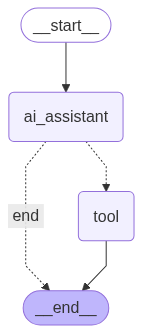

In [109]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))